# Step 1 : Data Setup :

Basics informations :
- Share's price are **in USD**

In [123]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime, time

In [124]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META','NVDA', 'BRK-B', 'JPM', 'JNJ', 'V','PG', 'UNH', 'MA', 'HD', 'XOM','BAC', 'KO', 'DIS', 'PEP']

benchmark_ticker = '^GSPC'  # S&P 500 ticker

start_date = '2015-01-01'
end_date = datetime.datetime.now().strftime('%Y-%m-%d') # Today's date

In [125]:
# Download adjusted close prices for tickers & benchmark
prices_d = yf.download(tickers + [benchmark_ticker], start=start_date, end=end_date, auto_adjust=False)["Adj Close"]
prices_d.info()

[*********************100%***********************]  20 of 20 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2786 entries, 2015-01-02 to 2026-01-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2786 non-null   float64
 1   AMZN    2786 non-null   float64
 2   BAC     2786 non-null   float64
 3   BRK-B   2786 non-null   float64
 4   DIS     2786 non-null   float64
 5   GOOGL   2786 non-null   float64
 6   HD      2786 non-null   float64
 7   JNJ     2786 non-null   float64
 8   JPM     2786 non-null   float64
 9   KO      2786 non-null   float64
 10  MA      2786 non-null   float64
 11  META    2786 non-null   float64
 12  MSFT    2786 non-null   float64
 13  NVDA    2786 non-null   float64
 14  PEP     2786 non-null   float64
 15  PG      2786 non-null   float64
 16  UNH     2786 non-null   float64
 17  V       2786 non-null   float64
 18  XOM     2786 non-null   float64
 19  ^GSPC   2786 non-null   float64
dtypes: float64(20)
memory usage: 457.1 KB


In [126]:
prices_d.tail()

Ticker,AAPL,AMZN,BAC,BRK-B,DIS,GOOGL,HD,JNJ,JPM,KO,MA,META,MSFT,NVDA,PEP,PG,UNH,V,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,
2026-01-26,255.410004,238.419998,52.020000,483.470001,111.309998,333.260010,386.529999,221.490005,301.040009,72.559998,527.359985,672.359985,470.279999,186.470001,145.869995,149.490005,351.640015,328.489990,134.839996,6950.229980
2026-01-27,258.269989,244.679993,52.169998,474.670013,110.610001,334.549988,380.359985,224.440002,300.309998,73.550003,520.409973,672.969971,480.579987,188.520004,148.779999,148.339996,282.700012,325.260010,136.830002,6978.600098
2026-01-28,256.440002,243.009995,51.810001,473.489990,109.559998,336.010010,375.299988,227.720001,300.769989,73.059998,521.369995,668.729980,481.630005,191.520004,148.500000,147.339996,294.019989,326.980011,137.580002,6978.029785
2026-01-29,258.279999,241.729996,53.080002,476.790009,111.580002,338.250000,371.809998,227.289993,306.420013,73.430000,543.729980,738.309998,433.500000,192.509995,148.690002,149.899994,292.290009,331.799988,140.509995,6969.009766
2026-01-30,259.480011,239.300003,53.200001,480.529999,112.800003,338.000000,374.589996,227.250000,305.890015,74.809998,538.789978,716.500000,430.290009,191.130005,153.630005,151.770004,286.929993,321.829987,141.399994,6939.029785


# Step 2 : Switch to monthly prices (end of the month) :

In [127]:
prices_m = prices_d.resample('ME').last()
prices_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2015-01-31 to 2026-01-31
Freq: ME
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    133 non-null    float64
 1   AMZN    133 non-null    float64
 2   BAC     133 non-null    float64
 3   BRK-B   133 non-null    float64
 4   DIS     133 non-null    float64
 5   GOOGL   133 non-null    float64
 6   HD      133 non-null    float64
 7   JNJ     133 non-null    float64
 8   JPM     133 non-null    float64
 9   KO      133 non-null    float64
 10  MA      133 non-null    float64
 11  META    133 non-null    float64
 12  MSFT    133 non-null    float64
 13  NVDA    133 non-null    float64
 14  PEP     133 non-null    float64
 15  PG      133 non-null    float64
 16  UNH     133 non-null    float64
 17  V       133 non-null    float64
 18  XOM     133 non-null    float64
 19  ^GSPC   133 non-null    float64
dtypes: float64(20)
memory usage: 21.8 KB


In [128]:
prices_m.head()

Ticker,AAPL,AMZN,BAC,BRK-B,DIS,GOOGL,HD,JNJ,JPM,KO,MA,META,MSFT,NVDA,PEP,PG,UNH,V,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,
2015-01-31,25.973398,17.726500,12.021519,143.910004,82.825462,26.675943,80.666710,73.730690,40.474888,29.097836,76.725845,75.383423,34.437153,0.460696,67.410156,61.995804,89.065811,59.000942,54.541599,1994.989990
2015-02-28,28.590910,19.007999,12.545233,147.410004,94.772125,27.920542,88.646866,76.003975,45.610538,30.603260,84.302101,78.422188,37.643970,0.531359,71.147964,62.613625,95.252197,62.910992,55.656158,2104.500000
2015-03-31,27.693964,18.605000,12.250147,144.320007,95.509705,27.527014,88.217781,74.587837,45.089531,28.897448,80.803955,81.649651,34.905453,0.504141,69.193367,60.267357,99.490280,60.668736,53.430920,2067.889893
2015-04-30,27.854212,21.089001,12.679975,141.210007,98.997185,27.232737,83.069618,73.549858,47.397198,28.904573,84.531792,78.223579,41.756039,0.534731,68.831543,58.950478,93.695305,61.262341,54.920704,2085.510010
2015-05-31,29.117100,21.461500,13.133684,143.000000,100.499634,27.061531,86.517288,74.788200,49.285301,29.189623,86.452751,78.640678,40.489407,0.535512,69.779518,58.120056,101.105133,63.813187,53.999607,2107.389893


In [129]:
monthly_prices = prices_m[tickers]
bench_prices = prices_m[benchmark_ticker]

In [130]:
monthly_prices.tail()

Ticker,AAPL,MSFT,AMZN,GOOGL,META,NVDA,BRK-B,JPM,JNJ,V,PG,UNH,MA,HD,XOM,BAC,KO,DIS,PEP
Date,,,,,,,,,,,,,,,,,,,
2025-09-30,254.383408,516.982422,219.570007,242.941101,733.781555,186.569611,502.739990,312.494293,184.250153,340.705139,151.507278,342.993866,567.208069,402.586151,111.772377,51.323288,65.857430,113.730515,139.079666
2025-10-31,270.108154,516.842651,244.220001,281.006195,647.821655,202.478729,477.540009,309.722900,187.678391,340.066406,149.309891,339.278870,551.162109,377.150665,113.368416,53.173672,68.419434,111.863152,144.674942
2025-11-30,278.850006,492.010010,233.220001,319.970703,647.421997,176.990143,513.809998,311.674103,206.919998,334.440002,147.115479,327.567596,549.704346,354.626373,115.919998,53.372639,72.610001,103.767921,147.299271
2025-12-31,271.859985,483.619995,230.820007,313.000000,660.090027,186.500000,502.649994,320.773071,206.949997,350.709991,142.299667,330.109985,570.023804,344.100006,120.339996,55.000000,69.910004,113.769997,143.520004
2026-01-31,259.480011,430.290009,239.300003,338.000000,716.500000,191.130005,480.529999,305.890015,227.250000,321.829987,151.770004,286.929993,538.789978,374.589996,141.399994,53.200001,74.809998,112.800003,153.630005


In [131]:
bench_prices = bench_prices.to_frame()
bench_prices.head()

,^GSPC
Date,
2015-01-31,1994.989990
2015-02-28,2104.500000
2015-03-31,2067.889893
2015-04-30,2085.510010
2015-05-31,2107.389893


# Step 3 : Monthly returns :

Basics : 
- We calculate returns by dividing : **(Pt / Pt-1) - 1**
- In python, we just use **.pct_change()**

In [132]:
monthly_returns = monthly_prices.pct_change()
bench_returns   = bench_prices.pct_change()

In [133]:
bench_returns.tail()

,^GSPC
Date,
2025-09-30,0.035324
2025-10-31,0.022687
2025-11-30,0.001300
2025-12-31,-0.000524
2026-01-31,0.013663


In [134]:
#If we want to see bench returns in percentage
(bench_returns * 100).round(2).tail()

,^GSPC
Date,
2025-09-30,3.53
2025-10-31,2.27
2025-11-30,0.13
2025-12-31,-0.05
2026-01-31,1.37


In [135]:
bench_returns.describe() #Quick stats on bench returns

,^GSPC
count,132.000000
mean,0.010412
std,0.043058
min,-0.125119
25%,-0.011913
50%,0.016538
75%,0.035395
max,0.126844


# Step 4 : Benchmark Buy & Hold

We build the B&H benchmark : 
- Monthly returns (previously calculated)
- Then we transform them into a cumulative performance over the years *(i.e : "growth of 100€ invested")*
    - **Ct​ = sum​(1+ri​)**

,^GSPC
Date,
2025-09-30,335.262833
2025-10-31,342.868898
2025-11-30,343.314497
2025-12-31,343.134554
2026-01-31,347.822787


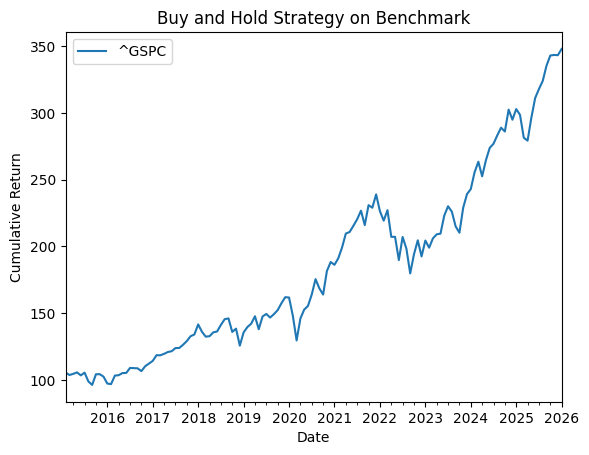

In [136]:
buy_and_hold_bench_curve = (1 + bench_returns.dropna()).cumprod()
bh_bench_100 = 100 * buy_and_hold_bench_curve

bh_bench_100.plot(title='Buy and Hold Strategy on Benchmark', ylabel='Cumulative Return', xlabel='Date')

bh_bench_100.tail()

Here we can see that the price does not start at 100 but at another value because the first month return is NaN and is dropped in the cumprod calculation

### **Equal-Weighted Strategy** (on stock universe, not benchmark) :
--> “Every month, I distribute my capital equally across all stocks in the universe, without any signals.”


<Axes: title={'center': 'Equal-Weighted Strategy'}, xlabel='Date', ylabel='Cumulative Return'>

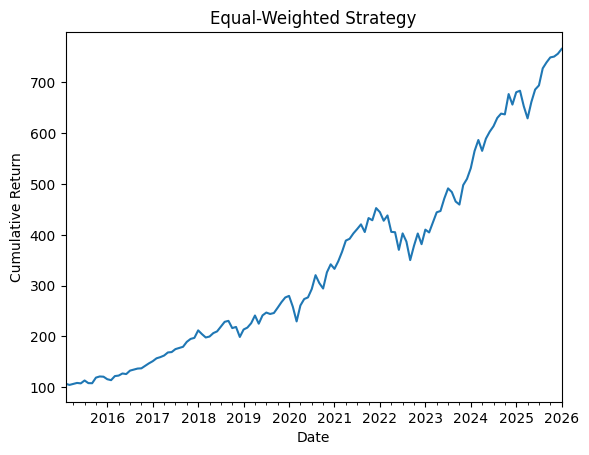

In [137]:
ew_returns = monthly_returns.mean(axis=1, skipna=True)
ew_curve = (1 + ew_returns.dropna()).cumprod()
ew_100 = 100 * ew_curve
ew_100.plot(title='Equal-Weighted Strategy', ylabel='Cumulative Return', xlabel='Date')

Here we answer to : “Does my momentum strategy offer anything beyond a simple diversified portfolio of these same stocks ?”

## **Bonus** : Drawdown & Monthly Return Histogram

We want to describe the loss in value of an investment and measure the decline from peak to trough in an investment portfolio before it reaches a new peak.

In other words : **Drawdown = Maximum loss incurred by the portfolio relative to its past high**

In other words : **Drawdown = measure of how much and for how long the portfolio can fall before returning to a new high**

Example : 
- **0% -> new high**

- **20% -> lost 20% compared to its last peak**

^GSPC   -0.247695
dtype: float64

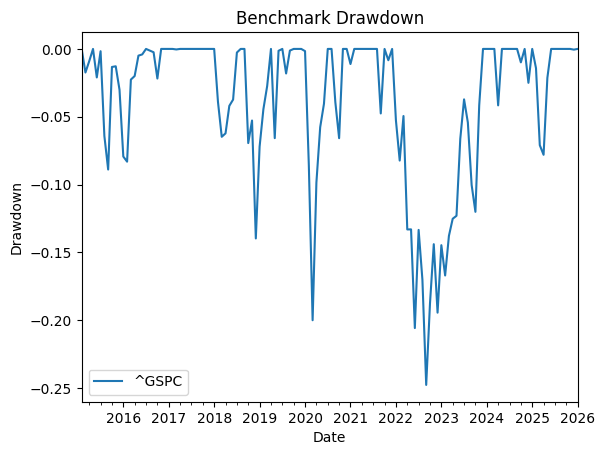

In [138]:
running_max = bh_bench_100.cummax()
bench_drawdown = bh_bench_100 / running_max - 1

bench_drawdown.plot(title="Benchmark Drawdown", ylabel="Drawdown", xlabel="Date")
bench_drawdown.min()

### **Distribution of returns** : Gaussian curve lookalike

array([[<Axes: title={'center': '^GSPC'}>]], dtype=object)

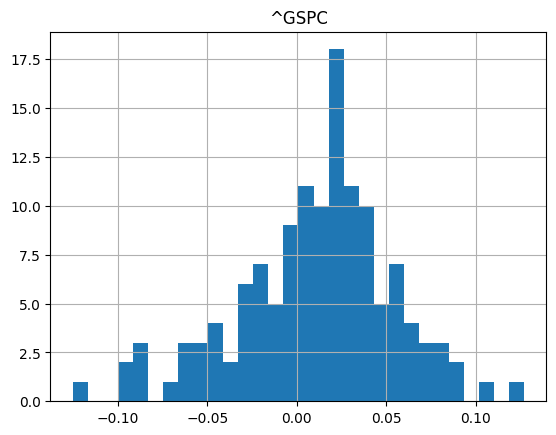

In [139]:
bench_returns.hist(bins=30)

# Step 5 : Momentum 12-1 signal :

**GOAL** :
We want to **build an indicator (signal) that ranks stocks based on their past performance** in order to decide which stocks to buy the following month.
- **Momentum strategy** --> Invest in the best-performing stocks
    - For each stock & each month :

        - Look performance over the last 12 months

        - Excluding the most recent month, WHY ? :

            - Avoid short-term effects (time series)

            - Very recent returns may have **Noise**

            - Standard definition in academic literature
            
    - Momentum(t) ​= (Pt−1 / ​Pt−13​) ​− 1

In [140]:
mom_12_1 = (monthly_prices.shift(1) / monthly_prices.shift(13)) - 1
mom_12_1.tail()

Ticker,AAPL,MSFT,AMZN,GOOGL,META,NVDA,BRK-B,JPM,JNJ,V,PG,UNH,MA,HD,XOM,BAC,KO,DIS,PEP
Date,,,,,,,,,,,,,,,,,,,
2025-09-30,0.018430,0.223795,0.282913,0.309471,0.421859,0.459621,0.056858,0.370946,0.102720,0.281798,-0.061381,-0.465061,0.238705,0.123648,0.004090,0.275669,-0.020179,0.321217,-0.108833
2025-10-31,0.097919,0.212732,0.178393,0.472246,0.286928,0.536837,0.092296,0.529514,0.181129,0.250327,-0.090444,-0.396612,0.158533,0.023682,-0.003355,0.330748,-0.049336,0.200726,-0.142199
2025-11-30,0.202374,0.283862,0.310193,0.650576,0.145898,0.525671,0.059035,0.431624,0.219663,0.183829,-0.065608,-0.381811,0.111234,-0.013107,0.014685,0.308175,0.086699,0.180888,-0.086359
2025-12-31,0.180260,0.170452,0.121843,0.903474,0.131751,0.280656,0.063745,0.280264,0.375743,0.068984,-0.151655,-0.447850,0.038941,-0.153013,0.018773,0.155811,0.166545,-0.102917,-0.054819
2026-01-31,0.090526,0.155842,0.052099,0.659936,0.130931,0.389165,0.108917,0.372663,0.474795,0.117583,-0.122599,-0.331357,0.090378,-0.093347,0.159772,0.280406,0.156000,0.033033,-0.018445


**IMPORTANT :** To avoid any use of future information (**look-ahead bias**), the signal is shifted by one month.

-> In other words : we're ranking only based on information available at the time of decision-making

In [141]:
mom_signal = mom_12_1.shift(1)
mom_signal.tail()

Ticker,AAPL,MSFT,AMZN,GOOGL,META,NVDA,BRK-B,JPM,JNJ,V,PG,UNH,MA,HD,XOM,BAC,KO,DIS,PEP
Date,,,,,,,,,,,,,,,,,,,
2025-09-30,-0.060966,0.285025,0.252059,0.124109,0.634455,0.520477,0.076123,0.423366,0.077653,0.309826,-0.040342,-0.558678,0.228634,0.022307,-0.025779,0.201401,0.046980,0.282399,-0.172154
2025-10-31,0.018430,0.223795,0.282913,0.309471,0.421859,0.459621,0.056858,0.370946,0.102720,0.281798,-0.061381,-0.465061,0.238705,0.123648,0.004090,0.275669,-0.020179,0.321217,-0.108833
2025-11-30,0.097919,0.212732,0.178393,0.472246,0.286928,0.536837,0.092296,0.529514,0.181129,0.250327,-0.090444,-0.396612,0.158533,0.023682,-0.003355,0.330748,-0.049336,0.200726,-0.142199
2025-12-31,0.202374,0.283862,0.310193,0.650576,0.145898,0.525671,0.059035,0.431624,0.219663,0.183829,-0.065608,-0.381811,0.111234,-0.013107,0.014685,0.308175,0.086699,0.180888,-0.086359
2026-01-31,0.180260,0.170452,0.121843,0.903474,0.131751,0.280656,0.063745,0.280264,0.375743,0.068984,-0.151655,-0.447850,0.038941,-0.153013,0.018773,0.155811,0.166545,-0.102917,-0.054819


# Step 6 : Building the portfolio

We want to transform momentum signals into a concrete portfolio by choosing stocks & their weight.
Portfolio with :
- N stocks with the best momentum

- Equal weighting btw selected stocks

- Rebalanced every month

In [142]:
# Parameter : number of top assets to select
top_n = 5

For each month :

- Rank stocks by their momentum

- Select best ones (take the N's first --> 5 here so 20% of weight each)

- we automatically ignore the stocks that are not selected

In [143]:
# We select the top N assets based on momentum signal :
ranks = mom_signal.rank(axis=1, ascending=False, method="first")
selected = ranks.le(top_n)  # True for top N
selected.tail()

Ticker,AAPL,MSFT,AMZN,GOOGL,META,NVDA,BRK-B,JPM,JNJ,V,PG,UNH,MA,HD,XOM,BAC,KO,DIS,PEP
Date,,,,,,,,,,,,,,,,,,,
2025-09-30,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False
2025-10-31,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False
2025-11-30,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False
2025-12-31,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False
2026-01-31,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False


In [144]:
# We distribute Equal-Weights to the selected assets :
weights = selected.astype(float)
weights = weights.div(weights.sum(axis=1), axis=0)  # somme=1 chaque mois
weights.tail()

Ticker,AAPL,MSFT,AMZN,GOOGL,META,NVDA,BRK-B,JPM,JNJ,V,PG,UNH,MA,HD,XOM,BAC,KO,DIS,PEP
Date,,,,,,,,,,,,,,,,,,,
2025-09-30,0.0,0.2,0.0,0.0,0.2,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-10-31,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
2025-11-30,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
2025-12-31,0.0,0.0,0.2,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
2026-01-31,0.2,0.0,0.0,0.2,0.0,0.2,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
# Portfolio Returns
port_returns = (weights * monthly_returns).sum(axis=1)
port_returns = port_returns.to_frame(name='portfolio_returns')
port_returns = port_returns.dropna()
port_returns.tail(20)

,portfolio_returns
Date,
2024-06-30,0.071742
2024-07-31,-0.014398
2024-08-31,0.016288
2024-09-30,0.015700
2024-10-31,0.035453
2024-11-30,0.085969
2024-12-31,-0.042336
2025-01-31,0.065773
2025-02-28,-0.054441


# Step 7 : Cumulative Curves + Benchmark Alignment

We want to compare on the EXACT same period

In [146]:
common_idx = port_returns.index.intersection(bench_returns.dropna().index)
port_returns_aligned  = port_returns.loc[common_idx]
bench_returns_aligned = bench_returns.loc[common_idx]
ew_returns_aligned    = ew_returns.loc[common_idx]

port_returns_aligned.tail(10)

,portfolio_returns
Date,
2025-04-30,-0.025361
2025-05-31,0.004651
2025-06-30,0.068867
2025-07-31,0.036585
2025-08-31,0.004552
2025-09-30,0.021043
2025-10-31,0.019904
2025-11-30,0.004441
2025-12-31,0.016268


In [147]:
port_curve = (1 + port_returns_aligned).cumprod()

bench_curve = (1 + bench_returns_aligned).cumprod()

ew_curve2 = (1 + ew_returns_aligned).cumprod()

In [148]:
port_100 = 100 * port_curve

bench_100 = 100 * bench_curve

ew_100_2 = 100 * ew_curve2

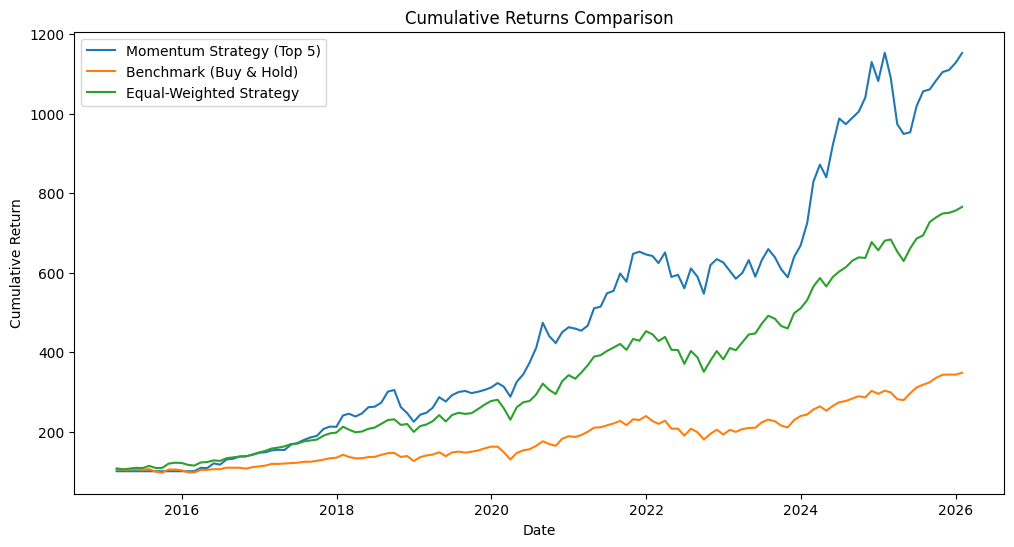

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(port_100, label='Momentum Strategy (Top {})'.format(top_n))
plt.plot(bench_100, label='Benchmark (Buy & Hold)')
plt.plot(ew_100_2, label='Equal-Weighted Strategy')
plt.title('Cumulative Returns Comparison')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.show()

# Step 8 : Statistics

We want to resume different strategies by comparing their performance & risk :

- **CAGR** (Compound Annual Growth Rate) : Average annual performance over the entire period

- **Annualized volatility** : Dispersion of monthly returns (a.k.a level of risk)

- **Sharpe Ratio** (rf = 0%) measures return per unit of risk

For a more real Sharpe Ratio : rf = 4.25 % --> US 10 y.o Treasury

In [150]:
def perf_stats(r, rf_annual=0.0):
    # Force to 1D Series
    if isinstance(r, pd.DataFrame):
        r = r.iloc[:, 0]
    r = pd.Series(r).dropna()

    rf_monthly = rf_annual / 12

    n = len(r)
    cagr = (1 + r).prod() ** (12 / n) - 1
    vol  = r.std() * np.sqrt(12)

    excess = r - rf_monthly
    sharpe = np.nan if vol == 0 else excess.mean() / excess.std() * np.sqrt(12)

    curve = (1 + r).cumprod()
    dd = curve / curve.cummax() - 1
    max_dd = dd.min()

    return pd.Series({
        "CAGR": cagr,
        "Volatility": vol,
        "Sharpe": sharpe,
        "MaxDD": max_dd,
        "Months": n
    })


stats = pd.concat([
    perf_stats(port_returns_aligned, rf_annual=0.0425).rename("Momentum 12-1 TopN"),
    perf_stats(ew_returns_aligned,   rf_annual=0.0425).rename("Equal-Weight"),
    perf_stats(bench_returns_aligned,rf_annual=0.0425).rename("Benchmark")
], axis=1)

stats


,Momentum 12-1 TopN,Equal-Weight,Benchmark
CAGR,0.248909,0.203274,0.119991
Volatility,0.187015,0.151664,0.149156
Sharpe,1.063547,1.024413,0.552740
MaxDD,-0.263088,-0.226008,-0.247695
Months,132.000000,132.000000,132.000000


In [153]:
stats_pct = stats.copy()

pct_rows = ["CAGR", "Volatility", "MaxDD"]
stats_pct.loc[pct_rows] = stats_pct.loc[pct_rows] * 100

stats_pct.style.format("{:.2f}")

,Momentum 12-1 TopN,Equal-Weight,Benchmark
CAGR,24.89,20.33,12.00
Volatility,18.70,15.17,14.92
Sharpe,1.06,1.02,0.55
MaxDD,-26.31,-22.60,-24.77
Months,132.00,132.00,132.00
